[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-03-franchise-input)

## 소상공인시장진흥공단 상가업소정보로 프랜차이즈 입점분석

* 배스킨라빈스와 던킨도너츠는 근처에 입지한 것을 종종 볼 수 있었어요.
* 또, 파리바게뜨와 뚜레주르는 주변에서 많이 볼 수 있는 프랜차이즈 중 하나에요. 
* 이런 프랜차이즈 매장이 얼마나 모여 있는지 혹은 흩어져 있는지 지도에 직접 표시를 해보면서 대용량 데이터에서 원하는 특정 데이터를 추출해 보는 실습을 해봅니다.
* 추출한 데이터를 전처리하고 가공해서 원하는 형태로 시각화를 하거나 지도에 표현합니다.
* Python, Pandas, Numpy, Seaborn, Matplotlib, folium 을 통해 다양한 방법으로 표현하면서 파이썬의 여러 도구들에 익숙해 지는 것을 목표로 합니다.

### 다루는 내용
* 데이터 요약하기
* 공공데이터를 활용해 텍스트 데이터 정제하고 원하는 정보 찾아내기
* 문자열에서 원하는 텍스트 추출하기
* 문자열을 활용한 다양한 분석 방법과 위치 정보 사용하기
* folium을 통한 위경도 데이터 시각화 이해하기
* folium을 통해 지도에 분석한 내용을 표현하기 - CircleMarker와 MarkerCluster 그리기


### 데이터셋
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

## 필요한 라이브러리 불러오기

In [13]:
# pandas, numpy, seaborn을 불러옵니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 구버전의 주피터 노트북에서 그래프가 보이는 설정
# %matplotlib inline

## 시각화를 위한 한글 폰트 설정하기

In [14]:
# 폰트가 선명하게 보이도록 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [15]:
# 한글폰트와 마이너스 폰트 설정 확인
plt.rc("font", family="D2Coding")
plt.rc("axes", unicode_minus=False)

## Google Colab 을 위한 코드
### Colab 에서 실행을 위한 코드

* 아래의 코드는 google colaboratory 에서 실행을 위한 코드로 로컬 아나콘다에서는 주석처리합니다.
* google colaboratory 에서는 주석을 풀고 폰트 설정과 csv 파일을 불러옵니다.

In [ ]:
# # 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic') 

### Colab 용 GoogleAuth 인증 
* 구글 드라이브에 있는 파일을 가져오기 위해 사용합니다.

In [ ]:
# # 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # PyDrive client 인증
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [ ]:
# # 공유 가능한 링크로 파일 가져오기
# url = 'https://drive.google.com/open?id=1e91PH_KRFxNXUsx8Hi-Q2vPiorCDsOP4'
# id = url.split('=')[1]
# print(id)
# downloaded = drive.CreateFile({'id':id}) 
# # data 폴더에 파일을 관리하며, 폴더가 없다면 만들어서 파일을 관리하도록 한다.
# %mkdir data
# downloaded.GetContentFile('data/상가업소정보_201912_01.csv')  

## 데이터 불러오기
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 공공데이터 포털에서 소상공인시장진흥공단 상가업소정보를 다운로드 받아 사용했습니다
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

In [8]:
# 파일을 불러와 df 라는 변수에 담습니다.

df_store = pd.read_csv("../resources/store_info_201912.csv", sep="|")
df_store.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


### 데이터 크기 보기

In [7]:
# shape 를 통해 불러온 csv 파일의 크기를 확인합니다.
df_store.shape

(573680, 39)

### info 보기

In [9]:
# info 를 사용하면 데이터의 전체적인 정보를 볼 수 있습니다.
# 데이터의 사이즈, 타입, 메모리 사용량 등을 볼 수 있습니다.

df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

### 결측치 보기

In [12]:
# isnull() 을 사용하면 데이터의 결측치를 볼 수 있습니다.
# 결측치는 True로 값이 있다면 False로 표시되는데 True 는 1과 같기 때문에 
# True 값을 sum()을 사용해서 더하게 되면 합계를 볼 수 있습니다.
# mean()을 사용하면 결측치의 비율을 볼 수 있습니다.

df_store.isnull()

df_store.isnull().sum()

df_store.isnull().mean()

상가업소번호       0.000000
상호명          0.000002
지점명          0.866347
상권업종대분류코드    0.000000
상권업종대분류명     0.000000
상권업종중분류코드    0.000000
상권업종중분류명     0.000000
상권업종소분류코드    0.000000
상권업종소분류명     0.000000
표준산업분류코드     0.059946
표준산업분류명      0.059946
시도코드         0.000000
시도명          0.000000
시군구코드        0.000000
시군구명         0.000000
행정동코드        0.000000
행정동명         0.000000
법정동코드        0.000000
법정동명         0.000000
지번코드         0.000000
대지구분코드       0.000000
대지구분명        0.000000
지번본번지        0.000000
지번부번지        0.172145
지번주소         0.000000
도로명코드        0.000000
도로명          0.000000
건물본번지        0.000000
건물부번지        0.874515
건물관리번호       0.000000
건물명          0.537010
도로명주소        0.000000
구우편번호        0.000000
신우편번호        0.000016
동정보          0.911351
층정보          0.394912
호정보          0.851370
경도           0.000000
위도           0.000000
dtype: float64

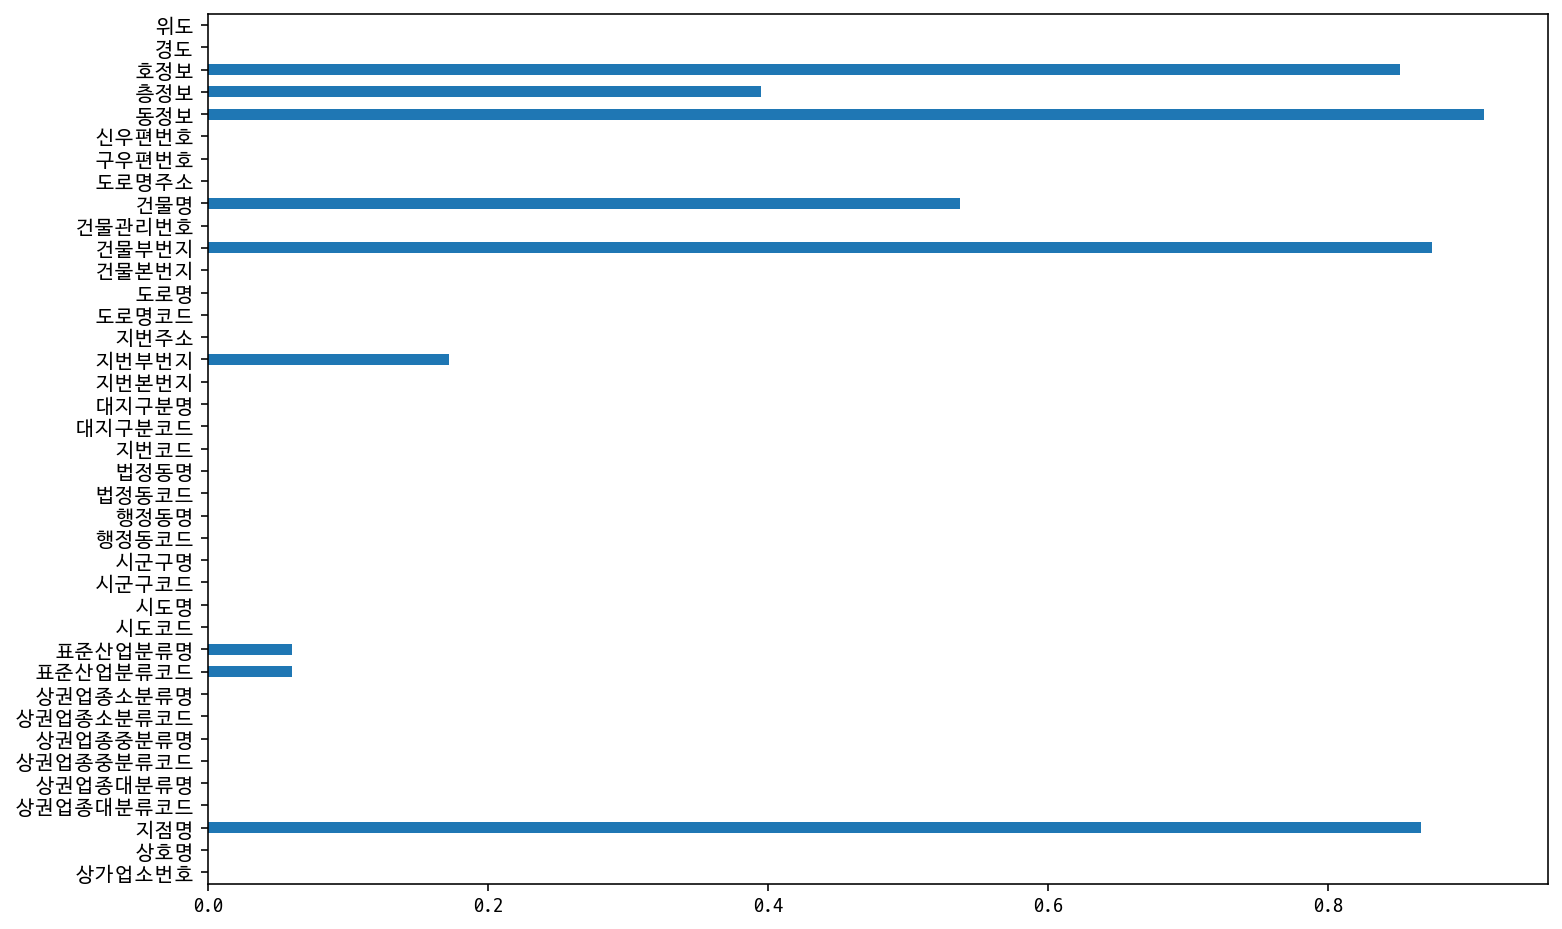

In [17]:
df_store.isnull().mean().plot.barh(figsize=(12,8))

### 사용하지 않는 컬럼 제거하기

In [23]:
# drop을 하는 방법도 있지만 사용할 컬럼만 따로 모아서 보는 방법도 있습니다.
# 여기에서는 사용할 컬럼만 따로 모아서 사용합니다.

columns = [
    "상호명", "상권업종대분류명", "상권업종중분류명", "상권업종소분류명", "시도명", "시군구명", "행정동명", "법정동명",
    "도로명주소", "경도", "위도"
]
df_store = df_store[columns].copy()
df_store

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,부산광역시 사상구 괘감로 37,128.980455,35.159774
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
...,...,...,...,...,...,...,...,...,...,...,...
573675,비파티세리공덕,음식,한식,한식/백반/한정식,서울특별시,마포구,공덕동,공덕동,서울특별시 마포구 마포대로14길 4,126.955059,37.548618
573676,앤탑PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,성동구,성수2가3동,성수동2가,서울특별시 성동구 성수일로8길 37,127.054615,37.545853
573677,오즈아레나PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,강남구,논현1동,논현동,서울특별시 강남구 강남대로 492,127.024102,37.506202
573678,파인트리네일,생활서비스,이/미용/건강,발/네일케어,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 국제금융로 10,126.924863,37.525172


In [24]:
# 제거 후 메모리 사용량 보기

#  제거 전 : memory usage: 170.7+ MB

df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


## 색인으로 서브셋 가져오기
### 서울만 따로 보기

In [28]:
# 시도명이 서울로 시작하는 데이터만 봅니다.
# 또, df_seoul 이라는 변수에 결과를 저장합니다.
# 새로운 변수에 데이터프레임을 할당할 때 copy()를 사용하는 것을 권장합니다.

df_seoul = df_store[df_store["시도명"] == "서울특별시"].copy()
df_seoul.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


In [33]:
# unique 를 사용하면 중복을 제거한 시군구명을 가져옵니다. 
# 그리고 shape로 갯수를 출력해 봅니다.

df_seoul["시군구명"].unique()

df_seoul["시군구명"].unique().shape

(25,)

In [34]:
# nunique 를 사용하면 중복을 제거한 시군구명의 갯수를 세어줍니다.

df_seoul["시군구명"].nunique()

25

## 파일로 저장하기
* 전처리한 파일을 저장해 두면 재사용을 할 수 있습니다.
* 재사용을 위해 파일로 저장합니다.

In [65]:
# "seoul_open_store.csv" 라는 이름으로 저장합니다.

# df_seoul.to_csv("seoul_open_store.csv")   # 이렇게만 하면 맨 앞에 타이틀 부분에 , 가 붙음

df_seoul.to_csv("seoul_open_store.csv", index=False)

In [66]:
# 제대로 저장이 되었는지 같은 파일을 불러와서 확인합니다.
pd.read_csv("seoul_open_store.csv").head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922,와라와라호프
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675,커피빈코리아선릉로93길점
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711,프로포즈
3,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249,가락사우나내스낵
4,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149,초밥왕


## 배스킨라빈스, 던킨도너츠 위치 분석

### 특정 상호만 가져오기
* 여기에서는 배스킨라빈스와 던킨도너츠 상호를 가져와서 실습합니다.
* 위에서 pandas의 str.conatains를 활용해 봅니다.
* https://pandas.pydata.org/docs/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern

* 상호명에서 브랜드명을 추출합니다.
* 대소문자가 섞여 있을 수도 있기 때문에 대소문자를 변환해 줍니다.
* 오타를 방지하기 위해 배스킨라빈스의 영문명은 baskinrobbins, 던킨도너츠는 dunkindonuts 입니다.

In [67]:
# 문자열의 소문자로 변경하는 메소드를 사용합니다.
# "상호명_소문자" 컬럼을 만듭니다.


# 베스킨라빈스의 경우에는 베스킨라빈스, 배스킨라빈스, baskinrobbins, Baskinrobbins 등 섞여있음

df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()

In [68]:
# baskinrobbins 를 "상호명_소문자" 컬럼으로 가져옵니다.
# 띄어쓰기 등의 다를 수 있기 때문에 앞글자 baskin 만 따서 가져오도록 합니다.

df_seoul[df_seoul["상호명_소문자"].str.contains('baskin')]

# '상호명_소문자'컬럼으로 '배스킨라빈스|baskin' 를 가져와 갯수를 세어봅니다.
df_seoul[df_seoul["상호명_소문자"].str.contains('baskinrobbins|배스킨라빈스|배스킨라빈스')].shape

# loc[행]
# loc[행, 열]

df_seoul.loc[df_seoul["상호명_소문자"].str.contains('baskinrobbins|배스킨라빈스|배스킨라빈스'),"상호명"]

76          배스킨라빈스
13953       배스킨라빈스
14242       배스킨라빈스
15512       배스킨라빈스
24841       배스킨라빈스
            ...   
557464    배스킨라빈스31
557822    배스킨라빈스31
558006    배스킨라빈스31
561929    배스킨라빈스31
561930    배스킨라빈스31
Name: 상호명, Length: 349, dtype: object

In [69]:
# 상호명에서 던킨도너츠만 가져옵니다.
# 상호명은 소문자로 변경해 준 컬럼을 사용합니다.
# 던킨|dunkin 의 "상호명_소문자"로 갯수를 세어봅니다.

df_seoul[df_seoul["상호명_소문자"].str.contains("던킨|dunkin")]

df_seoul[df_seoul["상호명_소문자"].str.contains("던킨|dunkin")].shape

(191, 12)

In [72]:
# '상호명_소문자'컬럼으로  '배스킨|베스킨|baskin|던킨|dunkin'를 가져와 df_31 변수에 담습니다.

df_31 = df_seoul[df_seoul["상호명_소문자"].str.contains("던킨|dunkin|배스킨라빈스|베스킨라빈스|baskinrobbins")].copy()
df_31.shape

(657, 12)

In [73]:
# ~은 not을 의미합니다. 베스킨라빈스가 아닌 데이터를 찾을 때 사용하면 좋습니다.
# 아래 코드처럼 결측치를 던킨도너츠로 채워줘도 괜찮습니다.

df_31.loc[df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"),"브랜드명"] = "베스킨라빈스"

In [79]:
# 던킨 도너츠 만들어주기

# df_31.loc[~df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), "브랜드명"] = "던킨"

df_31["브랜드명"] = df_31["브랜드명"].fillna("던킨도너츠")

In [80]:
# 'df_31에 담긴 상호명','브랜드명'으로 미리보기를 합니다.

df_31[["상호명","브랜드명"]]

,상호명,브랜드명
76,배스킨라빈스,베스킨라빈스
1167,던킨도너츠,던킨도너츠
1819,던킨도너츠테크노마트점,던킨도너츠
2164,베스킨라빈스,베스킨라빈스
2305,던킨도너츠창동하나로,던킨도너츠
...,...,...
558894,DUNKINDOONUTS,던킨도너츠
560984,던킨도너츠,던킨도너츠
561929,배스킨라빈스31,베스킨라빈스
561930,배스킨라빈스31,베스킨라빈스


In [81]:
# 데이터가 제대로 모아졌는지 확인합니다.
# "상권업종대분류명"을  value_counts 를 통해 빈도수를 계산합니다.

df_31["상권업종대분류명"].value_counts()

음식       655
소매         1
생활서비스      1
Name: 상권업종대분류명, dtype: int64

In [83]:
# 베스킨이나 던킨은 소매나 생활서비스는 아니기 때문에 제외해야 함
# "상권업종대분류명"컬럼에서 isin 기능을 사용해서 "소매", "생활서비스" 인 데이터만 가져옵니다.

df_31[df_31["상권업종대분류명"].isin(["소매", "생활서비스"])]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
358699,배스킨라빈스,소매,종합소매점,할인점,서울특별시,강남구,압구정동,신사동,서울특별시 강남구 압구정로 204,127.029381,37.527375,배스킨라빈스,베스킨라빈스
556592,baskinrobbins,생활서비스,광고/인쇄,인쇄종합,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 강남대로 396,127.028289,37.498154,baskinrobbins,베스킨라빈스


In [86]:
# "상권업종대분류명"에서 "소매", "생활서비스"는 제외합니다.
df_31 = df_31[~df_31["상권업종대분류명"].isin(["소매", "생활서비스"])].copy()
df_31.shape

(655, 13)

### 범주형 값으로 countplot 그리기

In [93]:
# value_counts 로 "브랜드명"의 빈도수를 구합니다.

brand_count = df_31["브랜드명"].value_counts()
brand_count

베스킨라빈스    464
던킨도너츠     191
Name: 브랜드명, dtype: int64

In [ ]:
# normalize=True 로 빈도수의 비율을 구합니다.
df_31["브랜드명"].value_counts(normalize=True)

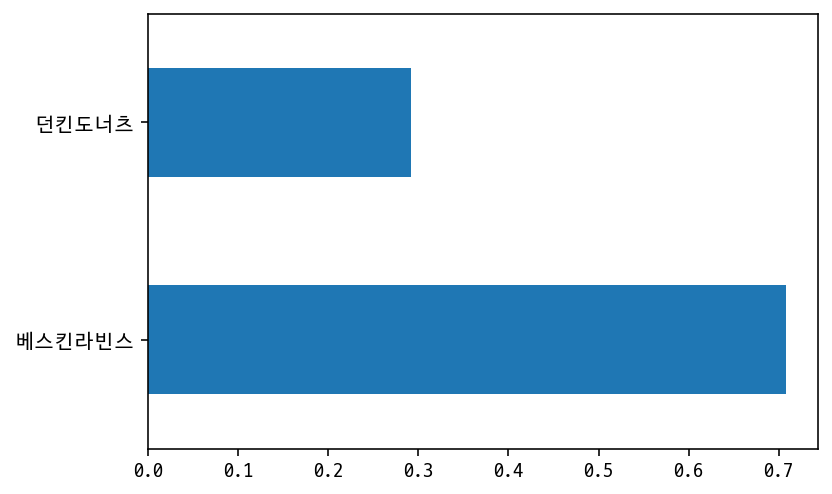

In [91]:
# df_31["브랜드명"].value_counts(normalize=True).plot()

# df_31["브랜드명"].value_counts(normalize=True).plot.bar()

df_31["브랜드명"].value_counts(normalize=True).plot.barh()

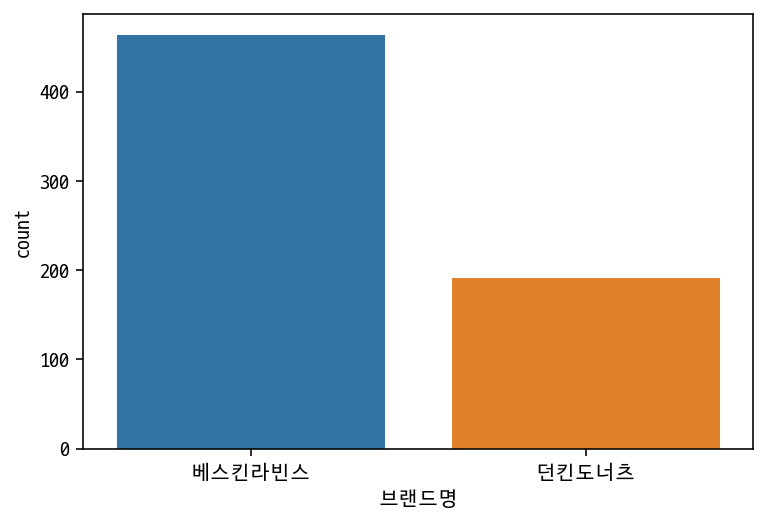

In [95]:
# countplot 을 그립니다.

sns.countplot(data=df_31, x="브랜드명")

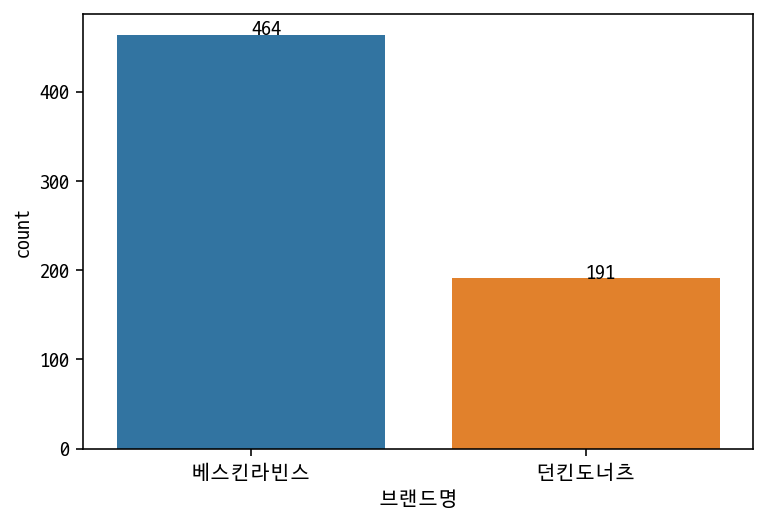

In [96]:
g = sns.countplot(data=df_31, x="브랜드명")

for i, val in enumerate(brand_count.index):
    g.text(x=i, y=brand_count[i], s=brand_count[i])


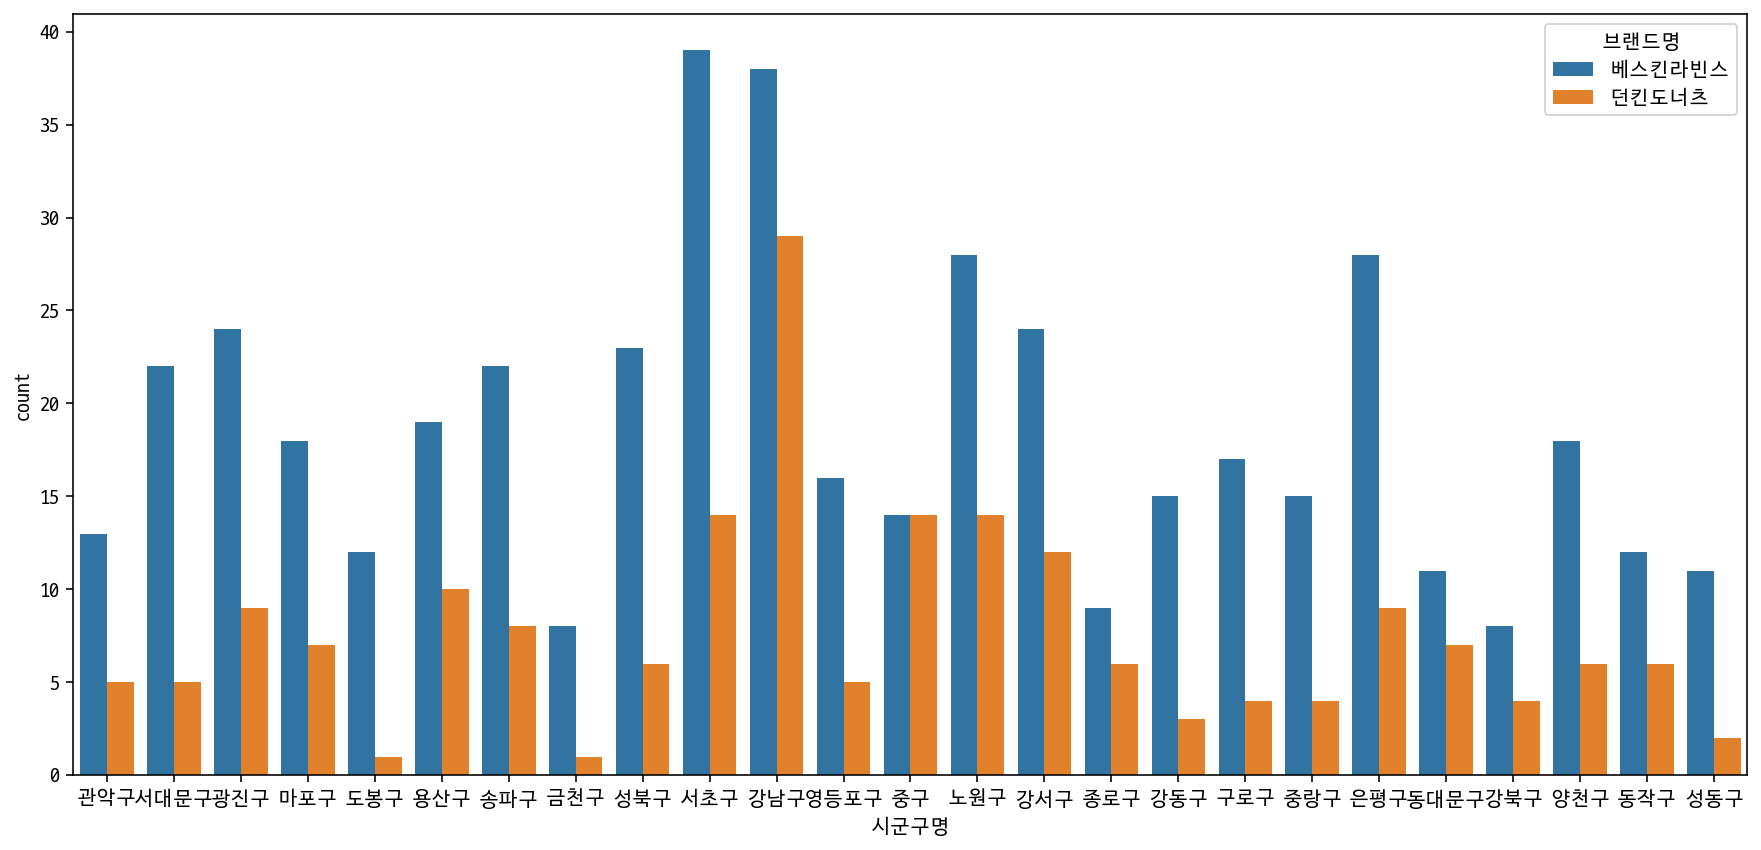

In [98]:
# 시군구명으로 빈도수를 세고 브랜드명으로 색상을 다르게 표현하는 countplot 을 그립니다.


plt.figure(figsize=(15,7))
g = sns.countplot(data=df_31, x="시군구명", hue="브랜드명")

### scatterplot 그리기

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

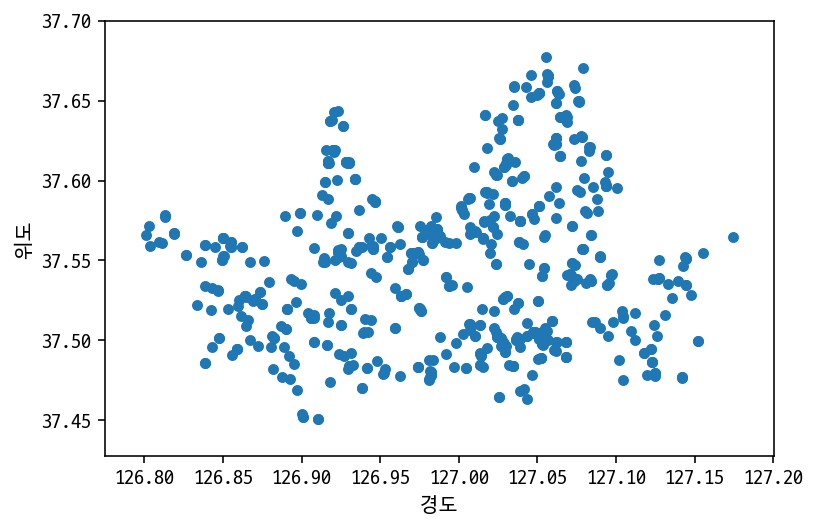

In [100]:
# Pandas 의 plot 으로 scatterplot 을 그립니다.
# 베스킨라빈스와 던킨 위치 찍어준 것

df_31[["위도","경도"]].plot.scatter(x="경도", y="위도")

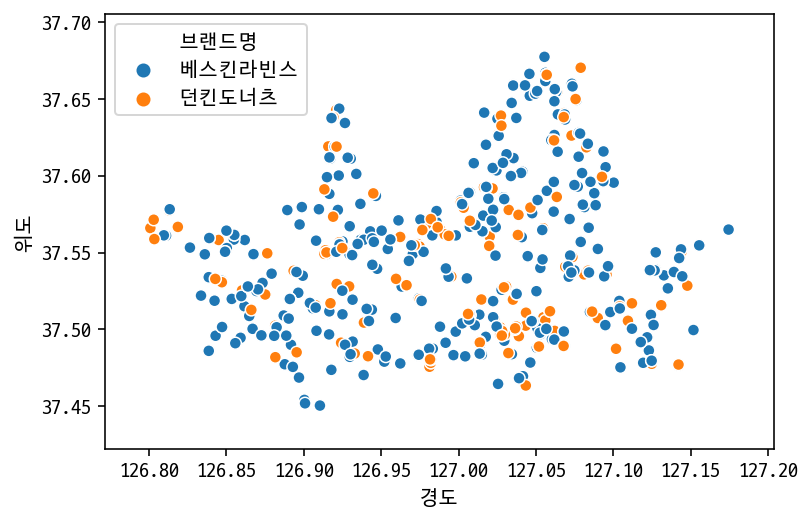

In [103]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화 합니다.

sns.scatterplot(data=df_31, hue="브랜드명", x="경도", y="위도")

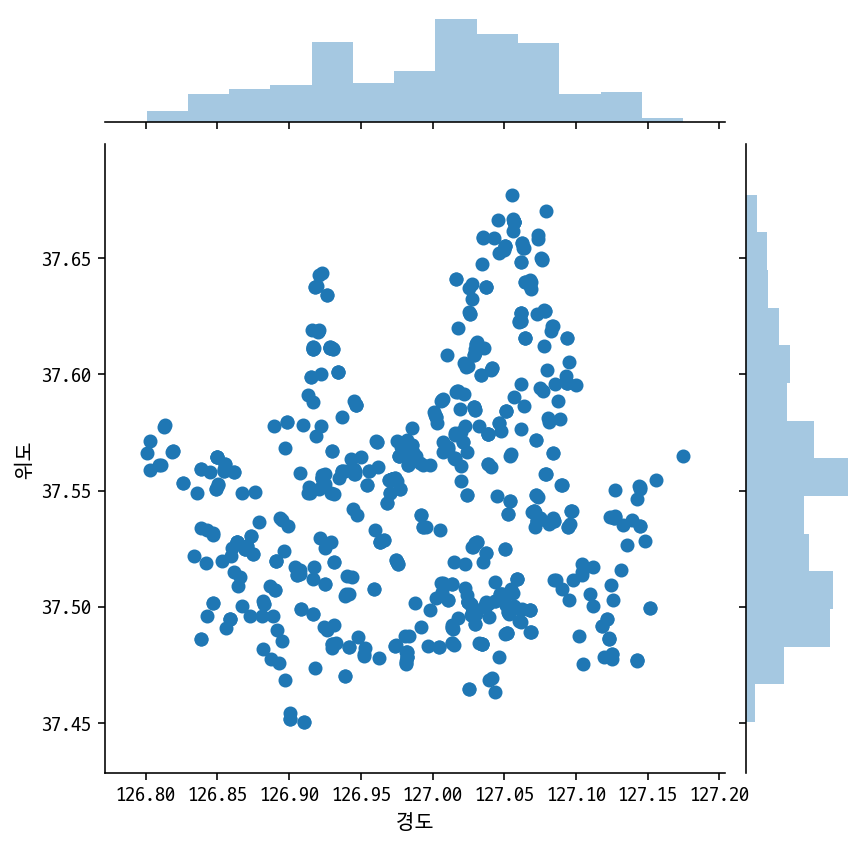

In [104]:
# 위에서 그렸던 그래프를 jointplot 으로 kind="hex" 을 사용해 그려봅니다.
# joinplot => scatter + histogram

sns.jointplot(data=df_31,x="경도", y="위도")

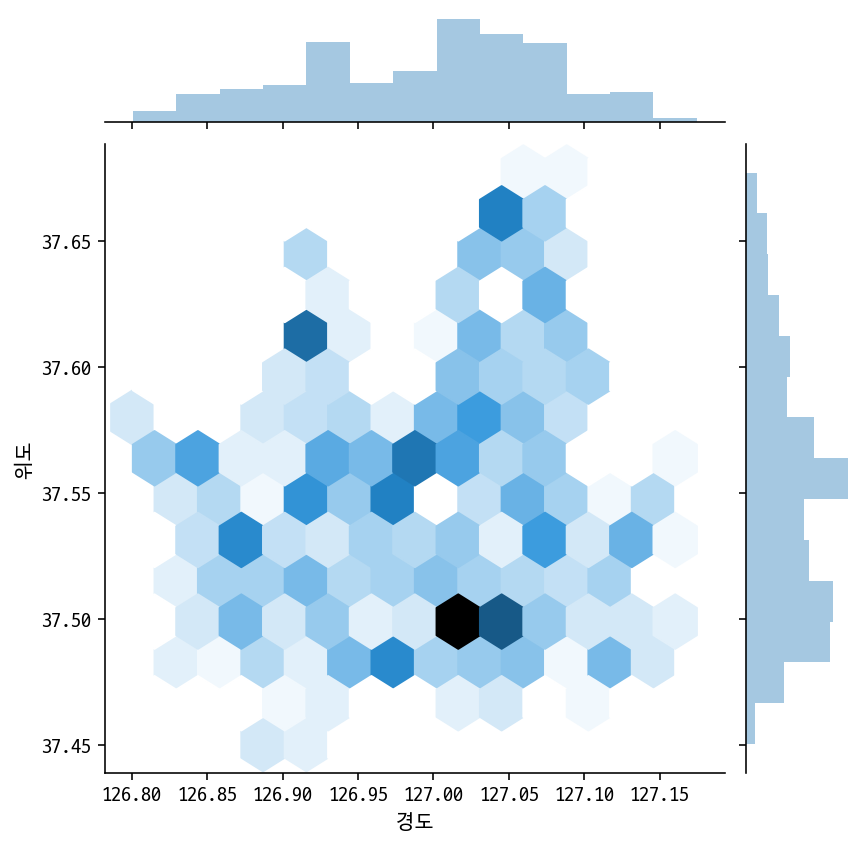

In [105]:
# hex 를 사용해서 육각형 모양으로 

sns.jointplot(data=df_31,x="경도", y="위도", kind="hex")

## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://i.imgur.com/x7pzfCP.jpg">
* <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.


* 윈도우
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


* 다음의 문서를 활용해서 지도를 표현합니다.
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb
* Folium 사용예제 :
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

In [ ]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium 
# 지도 시각화를 위한 라이브러리


In [109]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 
import folium

lat = df_31["위도"].mean()
long = df_31["경도"].mean()


In [116]:
# 샘플을 하나 추출해서 지도에 표시해 봅니다.

# random_state=31 : 항상 31번째 데이터 가져오기
df_31.sample(random_state=31)

m = folium.Map([lat,long],zoom_start=12)
folium.Marker([37.495593,127.039032], tooltip="던킨도너츠").add_to(m)
m

In [120]:
df_31.sample(random_state=60)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
357010,배스킨라빈스31창동하나로점,음식,패스트푸드,아이스크림판매,서울특별시,도봉구,창4동,창동,서울특별시 도봉구 마들로11길 20,127.050818,37.655101,배스킨라빈스31창동하나로점,베스킨라빈스


In [121]:
# folium 사용법을 보고 일부 데이터를 출력해 봅니다.

m = folium.Map([lat,long],zoom_start=12)
folium.Marker([37.548351,126.93123], tooltip="마포 던킨도너츠").add_to(m)
folium.Marker([37.495593,127.039032], tooltip="강남 던킨도너츠").add_to(m)
folium.Marker([37.655101,127.050818], tooltip="창동 베스킨라빈스").add_to(m)
m

In [122]:
# html 파일로 저장하기
# tooltip 의 한글이 깨져보인다면 html 파일로 저장해서 보세요.
m.save("beskin.html")

### 서울의 배스킨라빈스와 던킨도너츠 매장 분포
* 배스킨라빈스와 던킨도너츠 매장을 지도에 표현합니다.

In [123]:
# 데이터프레임의 인덱스만 출력합니다.
df_31.index

Int64Index([    76,   1167,   1819,   2164,   2305,   2342,   3007,  11060,
             13042,  13925,
            ...
            554896, 555145, 557464, 557822, 558006, 558894, 560984, 561929,
            561930, 569825],
           dtype='int64', length=655)

### 기본 마커로 표현하기

In [130]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.

m = folium.Map([lat,long],zoom_start=12)

for i in df_31.index:
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "상호명"] + "-" + df_31.loc[i, "도로명주소"]
    
    # 색상 변경
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "red"
    else:
        icon_color = "blue"
    
    folium.Marker([sub_lat,sub_long], tooltip=title, icon=folium.Icon(color=icon_color)).add_to(m)
    
m.save("dunkin.html")    
m

### MarkerCluster 로 표현하기
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb

In [ ]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.


## 파리바게뜨와 뚜레주르 분석하기

### 데이터 색인으로 가져오기

In [ ]:
# str.contains 를 사용해서 뚜레(주|쥬)르|파리(바게|크라상) 으로 상호명을 찾습니다.
# df_bread 라는 데이터프레임에 담습니다.


### 가져온 데이터가 맞는지 확인하기

In [ ]:
# 잘못 가져온 데이터가 있는지 확인합니다.


In [ ]:
# 제과점과 상관 없을 것 같은 상점을 추출합니다.


In [ ]:
# "상권업종대분류명"이 "학문/교육"이 아닌 것만 가져옵니다.


In [ ]:
# 상호명의 unique 값을 봅니다.


In [ ]:
# 상호명이 '파스쿠찌|잠바주스'가 아닌 것만 가져오세요.



In [ ]:
# 브랜드명 컬럼을 만듭니다. "파리바게뜨" 에 해당되는 데이터에 대한 값을 채워줍니다.


In [ ]:
# 브랜드명 컬럼의 결측치는 "뚜레쥬르" 이기 때문에 fillna 를 사용해서 값을 채웁니다.


### 범주형 변수 빈도수 계산하기

In [ ]:
# 브랜드명의 빈도수를 봅니다.


In [ ]:
# countplot 으로 브랜드명을 그려봅니다.


In [ ]:
# 시군구별로 브랜드명의 빈도수 차이를 비교합니다.


In [ ]:
# scatterplot 으로 위경도를 표현해 봅니다.


In [ ]:
# jointplot 으로 위경도를 표현해 봅니다.


## 지도에 표현하기
### Marker 로 위치를 찍어보기

In [ ]:
# for i in df_bread.index:
#     print(i)

In [ ]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.


### MarkerCluster 로 표현하기
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb

### Heatmap 으로 그리기
https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Heatmap.ipynb

In [ ]:
# heatmap 예제 이해하기


In [ ]:
# heatmap 예제와 같은 형태로 데이터 2차원 배열 만들기


In [ ]:
# HeatMap 그리기
